In [ ]:
import pandas as pd

# Membaca dataset yang diunggah
file_path = "Pengalaman Terhadap Fasilitas Parkir Mobil di Fakultas Teknik UI (Jawaban) - Form Responses 1.csv"
df = pd.read_csv(file_path)

# Menampilkan informasi awal tentang dataset
df.info(), df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70 entries, 0 to 69
Data columns (total 17 columns):
 #   Column                                                                                                                    Non-Null Count  Dtype 
---  ------                                                                                                                    --------------  ----- 
 0   Timestamp                                                                                                                 70 non-null     object
 1   Nama                                                                                                                      70 non-null     object
 2   Jenis Kelamin                                                                                                             70 non-null     object
 3   Jenjang Pendidikan                                                                                                        70 non-null     obje

(None,
              Timestamp     Nama Jenis Kelamin Jenjang Pendidikan  \
 0   18/02/2025 8:08:31   Amalia     Perempuan                 S3   
 1  19/02/2025 10:21:34   Edisis     Laki-laki                 S3   
 2  19/02/2025 10:22:20     Kiun     Laki-laki                 S3   
 3  19/02/2025 10:23:48      Adi     Laki-laki                 S3   
 4  19/02/2025 10:24:26  Richard     Laki-laki                 S3   
 
        Departemen  \
 0    Teknik Sipil   
 1  Teknik Elektro   
 2    Teknik Sipil   
 3  Teknik Elektro   
 4    Teknik Mesin   
 
   Apakah anda membawa kendaraan pribadi (mobil) ke lingkungan Universitas Indonesia?  \
 0                                                NaN                                   
 1                                                 Ya                                   
 2                                                 Ya                                   
 3                                                 Ya                                  

In [ ]:
import numpy as np

# Menghapus kolom yang tidak relevan untuk analisis klaster (misalnya nama dan timestamp)
df_cleaned = df.drop(columns=["Timestamp", "Nama", "Departemen"])

# Menghapus baris dengan banyak nilai kosong
df_cleaned = df_cleaned.dropna(subset=["Seberapa sering anda mengendarai mobil ke lingkungan FTUI? (dalam satu minggu)",
                                       "Bagaimana pengalaman anda dalam mencari parkir mobil di lingkungan FTUI?",
                                       "Berapa lama rata-rata waktu yang anda habiskan untuk mencari tempar parkir di FTUI?",
                                       "Bagaimana menurut anda ketersediaan lahan parkir mobil di lingkungan FTUI?",
                                       "Seberapa puas anda dengan kondisi fasilitas parkir mobil FTUI saat ini?"],
                              how='any')

# Mengonversi variabel kategorikal ke numerik menggunakan label encoding
mapping_frekuensi = {
    "Setiap hari": 5,
    "4-6 hari": 4,
    "1-3 hari": 3,
    "Jarang sekali": 2,
    "Tidak pernah": 1
}
df_cleaned["Frekuensi Parkir"] = df_cleaned["Seberapa sering anda mengendarai mobil ke lingkungan FTUI? (dalam satu minggu)"].map(mapping_frekuensi)

mapping_pengalaman = {
    "Sangat sulit": 5,
    "Sulit": 4,
    "Cukup mudah": 3,
    "Mudah": 2,
    "Sangat mudah": 1
}
df_cleaned["Kesulitan Parkir"] = df_cleaned["Bagaimana pengalaman anda dalam mencari parkir mobil di lingkungan FTUI?"].map(mapping_pengalaman)

mapping_waktu_mencari = {
    ">20 menit": 5,
    "10 - 20 menit": 4,
    "5 - 10 menit": 3,
    "<5 menit": 2,
    "Langsung dapat": 1
}
df_cleaned["Waktu Mencari Parkir"] = df_cleaned["Berapa lama rata-rata waktu yang anda habiskan untuk mencari tempar parkir di FTUI?"].map(mapping_waktu_mencari)

mapping_ketersediaan = {
    "Sangat kurang": 5,
    "Kurang": 4,
    "Cukup": 3,
    "Baik": 2,
    "Sangat baik": 1
}
df_cleaned["Ketersediaan Parkir"] = df_cleaned["Bagaimana menurut anda ketersediaan lahan parkir mobil di lingkungan FTUI?"].map(mapping_ketersediaan)

# Menyimpan skor kepuasan yang sudah dalam bentuk numerik
df_cleaned["Tingkat Kepuasan"] = df_cleaned["Seberapa puas anda dengan kondisi fasilitas parkir mobil FTUI saat ini?"]

# Memilih hanya kolom numerik untuk analisis klaster
df_cluster = df_cleaned[["Frekuensi Parkir", "Kesulitan Parkir", "Waktu Mencari Parkir", "Ketersediaan Parkir", "Tingkat Kepuasan"]]

# Menampilkan data yang sudah dikonversi
df_cluster.head()


,Frekuensi Parkir,Kesulitan Parkir,Waktu Mencari Parkir,Ketersediaan Parkir,Tingkat Kepuasan
0,5.0,5,5,5,2
1,3.0,4,3,5,2
2,3.0,5,4,5,1
3,3.0,5,4,5,3
5,NaN,5,4,5,2


In [ ]:
# Menghapus baris yang masih memiliki nilai NaN setelah konversi
df_cluster = df_cluster.dropna()

# Menampilkan informasi dataset setelah pembersihan
df_cluster.info(), df_cluster.head()


<class 'pandas.core.frame.DataFrame'>
Index: 38 entries, 0 to 69
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Frekuensi Parkir      38 non-null     float64
 1   Kesulitan Parkir      38 non-null     int64  
 2   Waktu Mencari Parkir  38 non-null     int64  
 3   Ketersediaan Parkir   38 non-null     int64  
 4   Tingkat Kepuasan      38 non-null     int64  
dtypes: float64(1), int64(4)
memory usage: 1.8 KB


(None,
     Frekuensi Parkir  Kesulitan Parkir  Waktu Mencari Parkir  \
 0                5.0                 5                     5   
 1                3.0                 4                     3   
 2                3.0                 5                     4   
 3                3.0                 5                     4   
 11               5.0                 5                     4   
 
     Ketersediaan Parkir  Tingkat Kepuasan  
 0                     5                 2  
 1                     5                 2  
 2                     5                 1  
 3                     5                 3  
 11                    5                 1  )

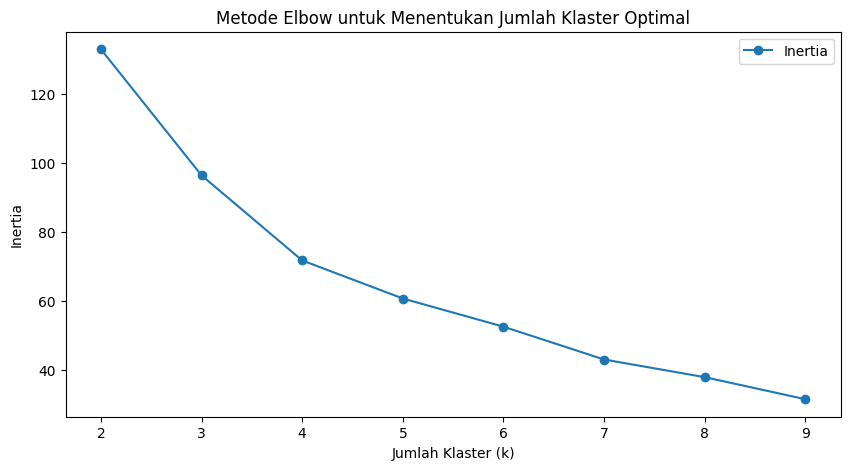

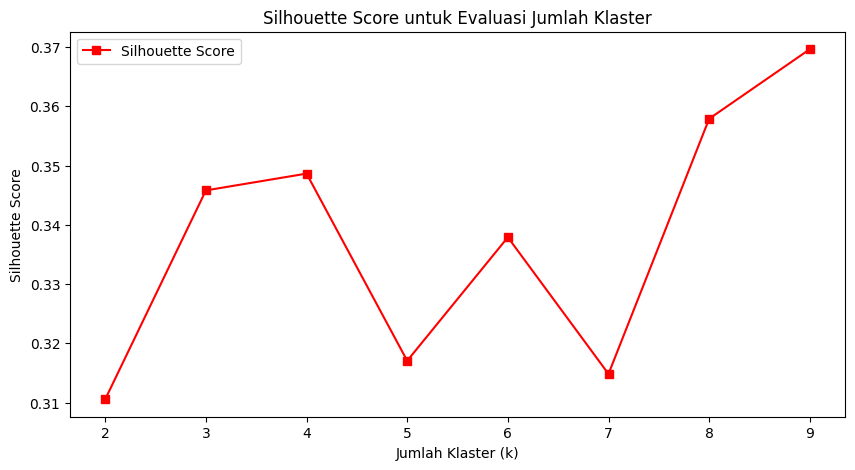

In [ ]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

# Standarisasi data untuk memastikan skala yang seimbang
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_cluster)

# Menentukan jumlah klaster optimal menggunakan metode Elbow
inertia = []
silhouette_scores = []
K_range = range(2, 10)  # Menggunakan 2 hingga 9 klaster untuk analisis

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(df_scaled)
    inertia.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(df_scaled, kmeans.labels_))

# Visualisasi Elbow Method
plt.figure(figsize=(10, 5))
plt.plot(K_range, inertia, marker='o', linestyle='-', label="Inertia")
plt.xlabel("Jumlah Klaster (k)")
plt.ylabel("Inertia")
plt.title("Metode Elbow untuk Menentukan Jumlah Klaster Optimal")
plt.legend()
plt.show()

# Visualisasi Silhouette Score
plt.figure(figsize=(10, 5))
plt.plot(K_range, silhouette_scores, marker='s', linestyle='-', color='r', label="Silhouette Score")
plt.xlabel("Jumlah Klaster (k)")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Score untuk Evaluasi Jumlah Klaster")
plt.legend()
plt.show()


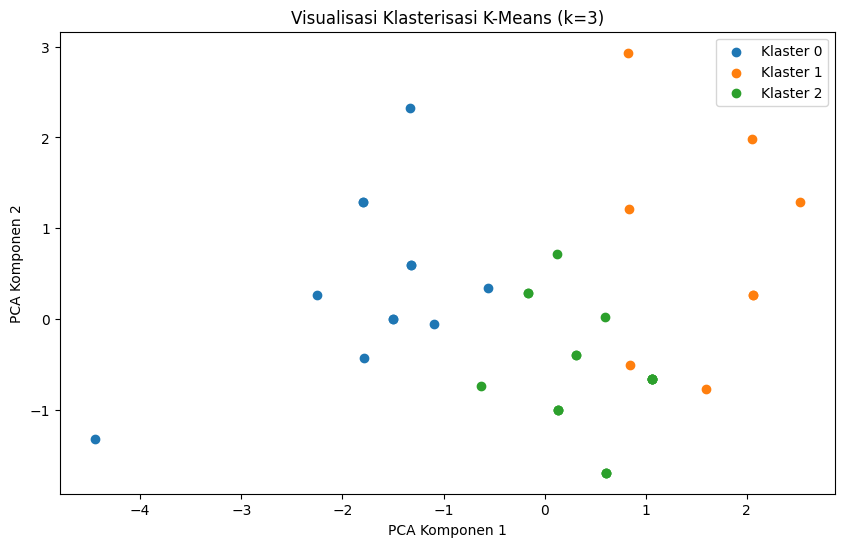

In [ ]:
# Melakukan klasterisasi dengan K-Means untuk k=3
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
df_cluster["Cluster"] = kmeans.fit_predict(df_scaled)

# Visualisasi hasil klasterisasi menggunakan PCA untuk reduksi dimensi ke 2D
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
df_pca = pca.fit_transform(df_scaled)
df_cluster["PCA1"] = df_pca[:, 0]
df_cluster["PCA2"] = df_pca[:, 1]

# Plot hasil klasterisasi
plt.figure(figsize=(10, 6))
for cluster in range(3):
    plt.scatter(df_cluster[df_cluster["Cluster"] == cluster]["PCA1"],
                df_cluster[df_cluster["Cluster"] == cluster]["PCA2"],
                label=f"Klaster {cluster}")

plt.xlabel("PCA Komponen 1")
plt.ylabel("PCA Komponen 2")
plt.title("Visualisasi Klasterisasi K-Means (k=3)")
plt.legend()
plt.show()


In [ ]:
# Menampilkan statistik deskriptif per klaster
df_cluster.groupby("Cluster").mean()


,Frekuensi Parkir,Kesulitan Parkir,Waktu Mencari Parkir,Ketersediaan Parkir,Tingkat Kepuasan,PCA1,PCA2
Cluster,,,,,,,
0,3.0,4.083333,3.500000,4.0,2.5,-1.725446,0.409136
1,5.0,4.625000,4.125000,5.0,1.5,1.598623,0.834647
2,3.0,4.722222,3.611111,5.0,1.5,0.439798,-0.643711


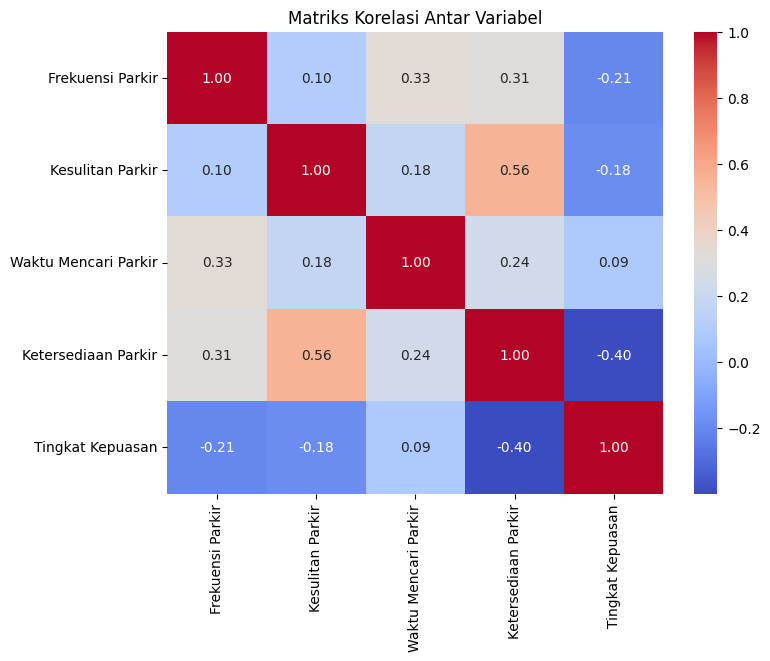

In [ ]:
import seaborn as sns

# Menghitung korelasi antar variabel
corr_matrix = df_cluster.drop(columns=["Cluster", "PCA1", "PCA2"]).corr()

# Visualisasi korelasi menggunakan heatmap
plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Matriks Korelasi Antar Variabel")
plt.show()
